# Mosaiques, etudes des mots, et du prix

On va essayer de créer une/des mosaique(s) avec les images de la base de données, les mosaiques crées sont de 3 types :
    - mosaiques avec les images 
    - mosaiques avec les couleurs dominantes de chaque image (en enlevant la couleur blanche)
    - mosaiques avec la couleur moyenne de chaque image
    - mosaiques par catégorie
    - mosaiques par prix
Vous trouverez aussi, des analyses sur le prix des jouets, ou encore les mots fréquents dans leur description. 

ATTENTION : je n'ai pas pu run le code en entier (beaucoup trop long) avant d'envoyer ce fichier, il est donc possible que certains morceaux ne run pas correctement (bien qu'ils aient tous fonctionné à un moment). 

In [1]:
import numpy as np
from skimage.io import imread, imsave
from skimage.transform import resize
import matplotlib.pyplot as plt
#from __future__ import print_function
import binascii
import struct
from PIL import Image
import numpy as np
import scipy
import scipy.misc
import scipy.cluster
import csv
import sys
import copy
%matplotlib inline


#### Récupérer les données  si elles sont sur drive

In [9]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!cp '/content/drive/My Drive/images_Marion.zip' ./imagesZip

In [11]:
!unzip imagesZip

Archive:  imagesZip
replace LaGrandeRecre/DB.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


#### Récupérer les données 

In [2]:
path_boy = 'Database_LGR_vrai/LaGrandeRecre/Boy/'
path_girl = 'Database_LGR_vrai/LaGrandeRecre/Girl/'
path_mixt = 'Database_LGR_vrai/LaGrandeRecre/Mixte/'
path_DB = 'Database_LGR_vrai/LaGrandeRecre/DB.csv'
path_marques = 'Database_LGR_vrai/LaGrandeRecre/marques.csv'

#### Lecture du fichier de la base de donnée

In [3]:
maxInt = sys.maxsize

while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

In [ ]:
csv.field_size_limit(maxInt)
with open(path_DB, newline='',encoding='utf-8') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';')
    for row in spamreader:
        print(row)

#### Détermination d'une nouvelle taille pour les images

In [1]:
new_shape = (20,20) # nouvelle forme pour les images

#### Fonction pour récupérer la couleur dominante des jouets

In [ ]:
from skimage.color import rgb2hsv
def get_couleur_dominante_hsv(im):
    hsv_img = rgb2hsv(im)
    ar = np.asarray(hsv_img)
    blanc = (ar[:,:,2]<0.9)
    har = (ar[:,:,0])[blanc]
    har = np.ravel(har)
    ARR = np.around(har,decimals = 1)
    
    (unique, counts) = np.unique(ARR, return_counts=True)
    index = np.argmax(counts)
    return(unique[index])

## Mosaiques par catégories d'age

In [23]:
#INITIALISATION DES VARIABLES

cat_id_index = 10 #index de la colonne qui correspond à l'id de catégorie d'âge
genre_index = 2

#POUR LES GARCONS
Garcons = [[],[],[],[],[],[]]
#POUR LES FILLES
Filles = [[],[],[],[],[],[]]
#POUR LES MIXTES
Mixte = [[],[],[],[],[],[]]

In [24]:
csv.field_size_limit(maxInt)
with open(path_DB, newline='',encoding='utf-8') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';')
    for row in spamreader:
        if(row[0]=="id" or row[10]=="undefined"):
            print("ligne 1")
        else:    
            genre = row[genre_index] #on récupère le genre du jouet
            cat = int(row[cat_id_index])
            id_jouet = row[0]
            if (genre == "Boy"):
                Garcons[cat].append(id_jouet)
            if (genre == "Girl"):
                Filles[cat].append(id_jouet)
            

ligne 1
ligne 1
ligne 1
ligne 1


In [12]:
print(len(Garcons[0]))
print(len(Garcons[1]))
print(len(Garcons[2]))
print(len(Garcons[3]))
print(len(Garcons[4]))
print(len(Garcons[5]))

268
1849
3262
4234
3017
1794


In [13]:
print(len(Filles[0]))
print(len(Filles[1]))
print(len(Filles[2]))
print(len(Filles[3]))
print(len(Filles[4]))
print(len(Filles[5]))

598
3192
4982
5468
3071
1026


#### Pour les garçons

In [135]:
# Garcons
dim1 = 10
dim2 = 10
genre = "Boy"
liste = copy.deepcopy(Garcons)
cat_traitee = 0
cat_string = "0"
path =path_boy
nom_fichier = "TEST_COULEUR" + genre + "s" + "cat" + cat_string + ".png"
mosaique_boys = np.zeros((dim1*new_shape[0], dim2*new_shape[1],3))
print(mosaique_boys.shape)

manquants_boys = []

for count1 in range(dim1):
    for count2 in range(dim2):
        count = count1*dim2+count2
        if (count<len(liste[cat_traitee])) :            
            try:
                image = imread(path + liste[cat_traitee][count]+'_0.jpg')
                image = resize(image, new_shape)
                mosaique_boys[count1*new_shape[0]:(count1+1)*new_shape[0], count2*new_shape[1]:(count2+1)*new_shape[1], :] = image
            #si l'image n'existe pas
            except:
                manquants_boys.append(count)
                mosaique_boys[count1*new_shape[0]:(count1+1)*new_shape[0], count2*new_shape[1]:(count2+1)*new_shape[1], :] = 1
                pass
        else : 
             mosaique_boys[count1*new_shape[0]:(count1+1)*new_shape[0], count2*new_shape[1]:(count2+1)*new_shape[1], :] = 1

        if count % ((dim1*dim2)//10) == 0:
            print(int(round(10*count/(dim1*dim2)))*10, "% loaded")
#imsave(nom_fichier, mosaique_boys) #pour sauvegarder l'image

(1500, 1900, 3)
0 % loaded
10 % loaded
20 % loaded
30 % loaded
40 % loaded
50 % loaded
60 % loaded
70 % loaded
80 % loaded
90 % loaded
100 % loaded


#### Pour les filles

In [136]:
#Filles
dim1 = 15
dim2 = 15
genre = "Girl"
liste = copy.deepcopy(Filles)
cat_traitee = 5
cat_string = "5"
path =path_girl
nom_fichier = genre + "s" + "cat" + cat_string + ".png"
mosaique_girls = np.zeros((dim1*new_shape[0], dim2*new_shape[1],3))

manquants_girls = []

for count1 in range(dim1):
    for count2 in range(dim2):
        count = count1*dim2+count2
        if (count<len(liste[cat_traitee])) :            
            try:
                image = imread(path + liste[cat_traitee][count]+'_0.jpg')
                image = resize(image, new_shape)
                mosaique_girls[count1*new_shape[0]:(count1+1)*new_shape[0], count2*new_shape[1]:(count2+1)*new_shape[1], :] = image
            #si l'image n'existe pas
            except:
                manquants_girls.append(count)
                mosaique_girls[count1*new_shape[0]:(count1+1)*new_shape[0], count2*new_shape[1]:(count2+1)*new_shape[1], :] = 1
                pass
        else : 
             mosaique_girls[count1*new_shape[0]:(count1+1)*new_shape[0], count2*new_shape[1]:(count2+1)*new_shape[1], :] = 1

        if count % ((dim1*dim2)//10) == 0:
            print(int(round(10*count/(dim1*dim2)))*10, "% loaded")
#imsave(nom_fichier, mosaique_boys)

0 % loaded
10 % loaded
20 % loaded
30 % loaded
40 % loaded
50 % loaded
60 % loaded
70 % loaded
80 % loaded
90 % loaded
100 % loaded


In [137]:
mosaique = np.hstack((mosaique_boys, mosaique_girls))
imsave('BoysGirls5.png', mosaique)

C:\Users\marion\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


## Marques les plus fréquentes

#### Récupération des noms des marques

In [20]:
LISTEM = [] #stocke les noms de toutes ls marques pour faire la correspondance avec leur numéro. 

csv.field_size_limit(maxInt)
with open(path_marques, newline='',encoding='utf-8') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';')
    for row in spamreader:
        if(row[0]=="marque_id"):
            print("ligne 1")
        else:    
            LISTEM.append(row[1])

print(LISTEM)

ligne 1
['AB LUDIS', 'ABY SMILE', 'ABY STYLE', 'ABYSSE CORP', 'AEDIS', 'AIR HOGS', 'ALEX', 'AMIX', 'AMSCAN', 'ANTSY LABS', 'ASMODÉE', 'AU SYCOMORE', 'AULDEY', 'AUZOU', 'AVENUE MANDARINE', 'BABY ART', 'BABYSUN PELUCHE', 'BAGHERA', 'BAGTROTTER', 'BANDAI', 'BERG', 'BESTWAY', 'BIGMOUTH', 'BIKE SPA E-ROAD', 'BIOVIVA', 'BLACKROCK', 'BLOOMY', 'BONBON BUDDIES', 'BONTEMPI SIGMA', 'BOOMCO', 'BORDAS', 'BRIO', 'BRUDER', 'BUILD ME UP', 'BUKI FRANCE', 'BULLYLAND', 'BURAGO', "C'EST PAS SORCIER", 'CALINOU', 'CANAL TOYS', 'CARRERA', 'CARTAMUNDI', 'CASTERMAN', 'CAUSE', 'CHICCO', 'CHICOS', 'CLAIREFONTAINE', 'CLEMENTONI', 'CLUB GAME', 'COLART', 'COLOR ME MINE', 'COROLLE', 'CRAYOLA', 'CÉSAR', "D'ARPÈJE", 'DELTA', 'DELTA CHILDREN', 'DELTA IMPORT', 'DEMEYERE', 'DICKIE TOYS', 'DISET', 'DISET NATHAN JEUX', 'DJECO', 'DOUDOU ET COMPAGNIE', 'DUJARDIN', 'E.M.D EDITIONS JEU', 'ECHHORN', 'ECOIFFIER', 'EDISON', 'EDITIONS LITO', 'EDUCA BORRAS', 'EPOCH', 'EVOLUTION', 'EXPLORIA', 'FALQUET', 'FAMOSA', 'FAMOSA FEBER', 'FA

#### Marques les plus présentes chez les filles

In [27]:
marque_indice = 15
dico = {}
L = ""

genre_index = 2

csv.field_size_limit(maxInt)
with open(path_DB, newline='',encoding='utf-8') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';')
    for row in spamreader:
        if(row[0]=="id"):
            print("ligne 1")
        else:    
            genre = row[genre_index]
            if(genre=="Girl"):
                d = row[marque_indice]
                l = d.split()
                for m in l:
                
                    L = L + LISTEM[int(m)] + " "
                    if m != "":
                        if m in dico:
                            dico[m] += 1
                        else:
                            dico[m] = 1


dico_t = sorted(dico.items(), key=lambda x: -x[1])
c = 0
a = 0 
LISTEG = []
while (c<50):
    print(dico_t[a][0], LISTEM[int(dico_t[a][0])])
    LISTEG.append(dico_t[a][0])
    c = c + 1
    a = a + 1

ligne 1
51 COROLLE
156 MATTEL
177 None
140 LEGO
100 HASBRO
87 GIOCHI PREZIOSI
244 TY
71 EPOCH
195 PLAYMOBIL
222 SMOBY
63 DOUDOU ET COMPAGNIE
135 LANSAY
95 HABA
206 RUBIE'S
250 VTECH
11 AU SYCOMORE
38 CALINOU
53 CÉSAR
230 TALDEC
47 CLEMENTONI
130 KLEIN
202 RAVENSBURGER
108 IMC TOYS
122 KALOO
117 JENNY
39 CANAL TOYS
114 JANOD
91 GOTZ
259 WOOZ'ART
225 SPIN MASTER
214 SENTOSPHÈRE
35 BULLYLAND
62 DJECO
137 LE COIN DES ENFANTS
145 LILLIPUTIENS
215 SES CREATIVE
54 D'ARPÈJE
167 MONDO ITALIE
105 HISTOIRE D'OURS
226 SPLASH TOYS
107 IL ÉTAIT UNE FOIS LES PRINCESSES
116 JEMINI
19 BANDAI
78 FASHION'Z
92 GP TOYS
243 TRUDI
8 AMSCAN
75 FAMOSA
131 KONTIKI
248 VILAC


In [17]:
print(L)

COROLLE HABA HABA HABA CHICCO LUDI SMOBY CRAYOLA COROLLE COROLLE TINY LOVE None None None None None None None None None None None None None None None None None VILAC LILLIPUTIENS HABA TINY LOVE DOUDOU ET COMPAGNIE DOUDOU ET COMPAGNIE DOUDOU ET COMPAGNIE DOUDOU ET COMPAGNIE DOUDOU ET COMPAGNIE DOUDOU ET COMPAGNIE DOUDOU ET COMPAGNIE DOUDOU ET COMPAGNIE DOUDOU ET COMPAGNIE DOUDOU ET COMPAGNIE VTECH PLAYSKOOL PLAYSKOOL COROLLE COROLLE COROLLE COROLLE COROLLE COROLLE CLEMENTONI FAMOSA FEBER SMOBY MONDO ITALIE LILLIPUTIENS LUDI COROLLE LUDI LUDI LILLIPUTIENS LILLIPUTIENS None None FISHER-PRICE TROUSSELIER HABA None None HABA None MONDO ITALIE None DOUDOU ET COMPAGNIE DOUDOU ET COMPAGNIE SMOBY LILLIPUTIENS LASSIG JANOD MOULIN ROTY KLEIN ECOIFFIER SOFT FRIENDS LILLIPUTIENS DOUDOU ET COMPAGNIE DOUDOU ET COMPAGNIE MOULIN ROTY LILLIPUTIENS VTECH COROLLE IMC TOYS VTECH LILLIPUTIENS DOUDOU ET COMPAGNIE COROLLE COROLLE LAMAZE LILLIPUTIENS DOUDOU ET COMPAGNIE TALDEC LILLIPUTIENS COROLLE None VTECH C

#### Marques les plus présentes chez les garçons

In [19]:
marque_indice = 15
dico = {}
L = ""

genre_index = 2

csv.field_size_limit(maxInt)
with open(path_DB, newline='',encoding='utf-8') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';')
    for row in spamreader:
        if(row[0]=="id"):
            print("ligne 1")
        else:    
            genre = row[genre_index]
            if(genre=="Boy"):
                d = row[marque_indice]
                l = d.split()
                for m in l:
                    L = L + LISTEM[int(m)] + " "
                    if m != "":
                        if m in dico:
                            dico[m] += 1
                        else:
                            dico[m] = 1


dico_t = sorted(dico.items(), key=lambda x: -x[1])
c = 0
a = 0 
LISTEB = []
while (c<50):
   
    print(dico_t[a][0],LISTEM[int(dico_t[a][0])])
    LISTEB.append(dico_t[a][0])
    c = c + 1
    a = a + 1

ligne 1


NameError: name 'LISTEM' is not defined

In [15]:
print(L)

ECOIFFIER BLOOMY LILLIPUTIENS HABA SMOBY LILLIPUTIENS LILLIPUTIENS BRIO CHICCO CHICCO None None None None None None None None None None None None None LILLIPUTIENS DOUDOU ET COMPAGNIE HABA DOUDOU ET COMPAGNIE DOUDOU ET COMPAGNIE DOUDOU ET COMPAGNIE CLEMENTONI LUDI ECOIFFIER LILLIPUTIENS LILLIPUTIENS None None None DOUDOU ET COMPAGNIE DOUDOU ET COMPAGNIE SILVERLIT DUJARDIN OKOÏA ECOIFFIER JANOD LILLIPUTIENS DOUDOU ET COMPAGNIE HABA VTECH CHICCO LILLIPUTIENS SMOBY HASBRO SPIN MASTER SPIN MASTER JEMINI None None LILLIPUTIENS LILLIPUTIENS LAMAZE VTECH LASSIG KALOO SMOBY FUN HOUSE DOUDOU ET COMPAGNIE LUDI LE COIN DES ENFANTS DOUDOU ET COMPAGNIE DOUDOU ET COMPAGNIE DOUDOU ET COMPAGNIE VULLI DOUDOU ET COMPAGNIE DOUDOU ET COMPAGNIE DOUDOU ET COMPAGNIE DOUDOU ET COMPAGNIE DOUDOU ET COMPAGNIE DOUDOU ET COMPAGNIE DOUDOU ET COMPAGNIE KALOO DOUDOU ET COMPAGNIE KALOO None LILLIPUTIENS MAY CHEONG GROUP B HABA JEMINI LUDI LUDI LILLIPUTIENS SIMBA TOYS DOUDOU ET COMPAGNIE DJECO INFANTINO DOUDOU ET COMPA

In [34]:
compteur = 0
C = []
for a in LISTEG : 
    if (a in LISTEB):
        compteur = compteur +1
        C.append(a)
        print(LISTEM[int(a)])

print(compteur)
print(C)

MATTEL
None
LEGO
HASBRO
GIOCHI PREZIOSI
PLAYMOBIL
SMOBY
DOUDOU ET COMPAGNIE
LANSAY
HABA
RUBIE'S
VTECH
CÉSAR
CLEMENTONI
KLEIN
IMC TOYS
KALOO
JANOD
SPIN MASTER
DJECO
LE COIN DES ENFANTS
LILLIPUTIENS
SES CREATIVE
D'ARPÈJE
MONDO ITALIE
BANDAI
AMSCAN
VILAC
28
['156', '177', '140', '100', '87', '195', '222', '63', '135', '95', '206', '250', '53', '47', '130', '108', '122', '114', '225', '62', '137', '145', '215', '54', '167', '19', '8', '248']


#### Liste des marques de jouets présentes chez les garçons mais pas chez les filles

In [36]:
compteur = 0
for a in LISTEB : 
    if (a not in LISTEG):
        compteur = compteur +1
        print(LISTEM[int(a)])
print(compteur)

BRUDER
JOHN WORLD
LGRI
BURAGO
BRIO
MAJORETTE
NERF
SIKU
SILVERLIT
MAISTO TECH
MECCANO
REVELL
ECOIFFIER
PROCOS
ASMODÉE
CHICCO
ABYSSE CORP
MOOV'NGO
NIKKO
YOOPY
SIMBA
AULDEY
22


#### Liste des marques de jouets présentes chez les filles mais pas chez les garçons

In [37]:
compteur = 0
for a in LISTEG : 
    if (a not in LISTEB):
        compteur = compteur +1
        print(LISTEM[int(a)])
print(compteur)

COROLLE
TY
EPOCH
AU SYCOMORE
CALINOU
TALDEC
RAVENSBURGER
JENNY
CANAL TOYS
GOTZ
WOOZ'ART
SENTOSPHÈRE
BULLYLAND
HISTOIRE D'OURS
SPLASH TOYS
IL ÉTAIT UNE FOIS LES PRINCESSES
JEMINI
FASHION'Z
GP TOYS
TRUDI
FAMOSA
KONTIKI
22


## Mots fréquents dans les noms de jouets 

#### Chez les filles

In [18]:
nom_indice = 1
dico = {}
L = ""

genre_index = 2

csv.field_size_limit(maxInt)
with open(path_DB, newline='',encoding='utf-8') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';')
    for row in spamreader:
        if(row[0]=="id"):
            print("ligne 1")
        else:    
            genre = row[genre_index]
            if(genre=="Boy"):
                d = row[nom_indice]
                l = d.split()
                for m in l:
                    if(len(m)>5):
                        L = L + m + " "
                    if m != "":
                        if m in dico:
                            dico[m] += 1
                        else:
                            dico[m] = 1


dico_t = sorted(dico.items(), key=lambda x: -x[1])
print(L)


ligne 1
ABRICK ANIMAUX VÉHICULES FRICTION ACTIDRAGON WALTER ACTIVITÉ D'ÉVEIL POUSSETTE CORSAIRE COQUIN D'ÉVEIL COTOONS CLASSICOS ARNOLD WALTER AMBULANCE POUSSER BLOCKS VÉHICULES SECOURS BLOCKS POMPIER PIÈCES ASSIETTE OUI-OUI CONCERT ASSIETTE PRINCES VIANDE VOISINS ASSIETTE PRINCES SERVIETTE GENOUX ASSIETTE PRINCES COUTEAU BOUCHE ASSIETTE PRINCES NOURRITURE BOUCHE ASSIETTE TRANSPORT PORTRAIT EMBOUTEILLAGE ASSIETTE TRANSPORT ASSIETTE HÉLICOPTÈRE ASSIETTE OUI-OUI ASSIETTE PRINCES BOUCHE FERMÉE ASSIETTE PRINCES ASSIETTE PRINCES BALANCE CHAISE ASSIETTE PRINCE PARFAIT ATTACHE-TÉTINE WALTER DRAGON ATTACHE-SUCETTE DOUDOU ATTACHE-TÉTINE SOURIS VOYAGE ATTACHE-TÉTINE VELCRO ATTRAPE-RÊVE ATTRAPE-RÊVES MICKEY NAGEUR BALLES BALLES BLEUES BRIQUES CONSTRUCTION ABRICK BAVOIR LILLIPUTIENS BAVOIR LILLIPUTIENS WALTER DRAGON PRINCES PRINCES MOUSTACHES OREILLES MUSIQUE MUSIQUE BRACELET ROBOCAR MICKEY CAMION POMPIER CAMION TRAVAUX PUBLICS CHARIOT ÉTABLI BRICOLO REDMASTER CHAUSSONS CHAUSSONS HOCHET CHEVALIER 

In [17]:
c = 0
a = 0 
while (c<200):
    if(len(dico_t[a][0])<=5):
        c=c
        a = a +1
    else :
        print(dico_t[a][0])
        c = c + 1
        a = a + 1

POUPÉE
NEIGES
PRINCESSE
DISNEY
COROLLE
COFFRET
PELUCHE
PRINCESSES
DÉGUISEMENT
BARBIE
POUPON
SYLVANIAN
PLAYMOBIL
FRIENDS
FAMILIES
CRÉATIF
FIGURINE
BIJOUX
LICORNE
LITTLE
DOUDOU
MINNIE
SEQUINS
PERLES
POUPÉES
ACCESSOIRES
MAGIQUE
PREMIER
SURPRISE
CRÉATION
TAILLE
BEANIE
RAIPONCE
PIÈCES
ENSEMBLE
CLASSIQUE
MANNEQUIN
MAISON
PRINCESS
FLEURS
CARNET
POUSSETTE
CHÂTEAU
BRACELETS
MAQUILLAGE
CENDRILLON
FAMILY
CHEVAL
CUISINE
COIFFER
SIRÈNE
CHAMBRE
STUDIO
MALLETTE
BANDOULIÈRE
MONSTER
CHEVEUX
VIOLETTA
VALISETTE
ENCHANTIMALS
PAILLETTES
D'ÉTOILES
PUZZLE
POUSSIÈRE
MUSICALE
FASHION
SHOPKINS
HATCHIMALS
SECRET
JOURNAL
LANDAU
PAPILLON
VOITURE
FAMILLE
VÊTEMENTS
STICKY
PANOPLIE
COLLIER
ATELIER
PENDENTIF
FIGURINES
MIRACULOUS
FLIPPABLES
PETITE
ANIMAUX
PYJAMA
REPASSER
VÊTEMENT
PORTE-MONNAIE
VEILLEUSE
CLOCHETTE
MONKOEUR
SOURIS
MODÈLE
DOCTEUR
D'ACTIVITÉS
COIFFURE
BLOPENS
FLAMANT
MOSAÏQUE
LICORNES
VAÏANA
PETSHOP
PORTE-CLÉS
CASQUE
BLANCHE
CHEVAUX
INTERACTIVE
LUMINEUX
REBELLE
JUMEAUX
ARC-EN-CIEL
INTERACTIF
INTIME
PATINET

#### Chez les garçons

In [8]:
nom_indice = 1
dico = {}
L = ""

genre_index = 2

csv.field_size_limit(maxInt)
with open(path_DB, newline='',encoding='utf-8') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';')
    for row in spamreader:
        if(row[0]=="id"):
            print("ligne 1")
        else:    
            genre = row[genre_index]
            if(genre=="Boy"):
                d = row[nom_indice]
                l = d.split()
                for m in l:
                    if(len(m)>5):
                        L = L + m + " "
                    if m != "":
                        if m in dico:
                            dico[m] += 1
                        else:
                            dico[m] = 1


dico_t = sorted(dico.items(), key=lambda x: -x[1])
c = 0
a = 0 
while (c<200):
    if(len(dico_t[a][0])<5):
        c=c
        a = a +1
    else :
        print(dico_t[a][0])
        c = c + 1
        a = a + 1
print(L)

ligne 1
PLAYMOBIL
FIGURINE
VOITURE
LEGO®
VÉHICULE
CAMION
COFFRET
SUPER
DÉGUISEMENT
MODÈLE
RADIOCOMMANDÉE
AVENGERS
RÉDUIT
POMPIER
SPIDER-MAN
ACTION
HEROES
NINJAGO
POLICE
CIRCUIT
BATMAN
NINJA
DRAGON
ECHELLE
TAILLE
POWER
MARVEL
VOITURES
ROUGE
VÉHICULES
COMBAT
PIÈCES
POMPIERS
PIRATE
MOUSSE
PAT'PATROUILLE
COURSE
WORLD
RADIOCOMMANDÉ
ACCESSOIRES
PIRATES
FIGURINES
MÉTAL
FERRARI
CREATOR
TECHNIC
CHEVALIER
WHEELS
BATEAU
CAPTAIN
HÉLICOPTÈRE
TRACTEUR
PISTOLET
CONSTRUCTION
MINECRAFT
TORTUES
KNIGHTS
STORY
REMORQUE
TRANSFORMERS
TURBO
ROBOT
AMERICA
PELUCHE
SPEED
GARAGE
BOUCLIER
TITAN
DELUXE
MASQUE
BIONICLE
ÉLECTRONIQUE
BLEUE
CHANTIER
RANGERS
PORSCHE
COLLECTION
MAJORETTE
RACING
BUGGY
CHAMPIONS
CONTRE
KALOO
SECOURS
TRANSPORT
DRAGONS
SPORT
BLACK
LASER
ROUES
MOVIE
BOSCH
ELITE
TRAIN
INFINITY
BOÎTE
MONKOEUR
L'ATTAQUE
DOUBLE
BALLON
SPIDERMAN
SABRE
GRAND
VADOR
VAISSEAU
DUPLO
JURASSIC
PENDENTIF
PANOPLIE
ARTICULÉE
HÉROS
PLANES
AVION
SUPERMAN
PUZZLE
PATROUILLE
TRANSFORMABLE
FORCE
MONSTER
PISTE
ABRICK
STATION
POUR

## Mots fréquents dans les descriptions de jouets

#### Chez les filles

In [30]:
description_indice = 4
dico = {}
L = ""

genre_index = 2

csv.field_size_limit(maxInt)
with open(path_DB, newline='',encoding='utf-8') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';')
    for row in spamreader:
        if(row[0]=="id"):
            print("ligne 1")
        else:    
            genre = row[genre_index]
            if(genre=="Girl"):
                d = row[description_indice]
                l = d.split()
                for m in l:
                    if(len(m)>5):
                        L = L + m + " "
                    if m != "":
                        if m in dico:
                            dico[m] += 1
                        else:
                            dico[m] = 1


dico_t = sorted(dico.items(), key=lambda x: -x[1])


ligne 1


In [31]:
print(L)

moelleuse, poupée doudou coquette petits paillettes. Entretien Lavable Séchage naturel. Vendue cadeau. Demoiselle précieuse Oriane Doudou Compagnie ravissante poupée souple. Elégance, couronne paillettes, boléro roses, jupette atouts feront demoiselle présentée cadeau plaira petits grands. Entretien lavable degrés. jolies couettes couleurs pétillantes, adorables Demoiselles Doudou Doudou Compagnie bonheur rassurent moment s’endormir. Présenté boîte, cadeau naissance parfait, jolies poupées souples toutes douces puisse facilement câliner. Accompagnée boîte. Lavables doudou Doudou Compagnie accompagne enfant rêves. Favorisant sérénité, notamment lorsque approche, doudou compose moelleux, l’enfant serrer contre Doudou Doudou Doudou matières micro-velours stimulent toucher invitent câlins couleurs tendres intemporelles. doudou boîte-cadeau. Doudou micro-velours réutilisable diamètre, accompagné délicat satin. Instructions d''entretien séparément machine assouplisseurs, détachants autres ad

In [29]:
c = 0
a = 0 
while (c<30):
    if(len(dico_t[a][0])<5):
        c=c
        a = a +1
    else :
        print(dico_t[a][0])
        c = c + 1
        a = a + 1

votre
enfant
enfants
poupée
Votre
coffret
Sylvanian
peluche
petits
accessoires
Contient
ainsi
collection
petit
Corolle
plein
faire
développe
imagination
permet
contient
comme
cette
poupon
figurine
sequins
grâce
grands
boîte
enfant.


#### Chez les garçons

In [32]:
description_indice = 4
dico_b = {}
LB = ""
genre_index = 2

csv.field_size_limit(maxInt)
with open(path_DB, newline='',encoding='utf-8') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';')
    for row in spamreader:
        if(row[0]=="id"):
            print("ligne 1")
        else:    
            genre = row[genre_index]
            if(genre=="Boy"):
                d = row[description_indice]
                l = d.split()
                for m in l:
                    if(len(m)>5):
                        LB = LB + m + " "
                    if m != "":
                        if m in dico_b:
                            dico_b[m] += 1
                        else:
                            dico_b[m] = 1


dico_tb = sorted(dico_b.items(), key=lambda x: -x[1])

ligne 1


In [33]:
print(LB)

pendentif Monkoeur Gabriel délicatement enfant. accessoire personnalisé Kalooest aisément accroché affaires, vêtements doudous Attachez pendentif MonKoeur Gabriel discrètement boucle grise. permet d'identifier instantanément affaires enfant. Pendentif doudou, délicatement naissance. Pendentif Monkoeur adorable velours brodé. Proposé marque Kaloo, accessoire s'attache toutes peluches enfant, ainsi, donnez petite touche personnelle assurant identifier aisément qu'elles soient Pendentif doudou, délicatement naissance. pendentif MonKoeur Nathan fabriqué microvelours l'utilisez identifier doudou vêtements simplifie quotidien. Accrochez pendentif MonKoeur Nathan simplement boucle habits accessoires souhaités. Pendentif doudou, délicatement naissance. pendentif velours personnalise doudou patapouf enfant emmène partout s’attache facilement peluche confusions doudou, crèche notamment. prénom délicatement brodé, apporter touche d’élégance peluche préférée tout-petit. Pendentif doudou, délicatem

In [28]:
c = 0
a = 0 
while (c<30):
    if(len(dico_tb[a][0])<5):
        c=c
        a = a +1
    else :
        print(dico_tb[a][0])
        c = c + 1
        a = a + 1

enfant
votre
enfants
LEGO®
figurines
construction
figurine
ainsi
peuvent
construire
voiture
développe
comprend
modèle
Contient
véhicule
faire
plein
Votre
véhicules
jouet
aventures
permet
Comprend
mesure
imagination
coffret
camion
leurs
grâce


## Etude des prix/taxe rose

#### Répartition des jouets en fonction de leur prix

In [5]:
Girls_prix = [[],[],[],[],[],[]]
Boys_prix = [[],[],[],[],[],[]]
S_G = 0
S_B = 0
C_G = 0
C_B = 0

prix_indice = 3
genre_index = 2

csv.field_size_limit(maxInt)
with open(path_DB, newline='',encoding='utf-8') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';')
    for row in spamreader:
        if(row[0]=="id"):
            print("ligne 1")
        else:    
            genre = row[genre_index] #on récupère le genre du jouer
            if(row[prix_indice]=="null" or row[prix_indice]=="None"):
                prix = 0
            else : 
                prix  = float(row[prix_indice])
                prix = int(prix//10)
                if(prix>5):
                    prix=5
                id_jouet = row[0]
                if (genre == "Boy"):
                    Boys_prix[prix].append(id_jouet)
                    S_B = S_B + float(row[prix_indice])
                    C_B = C_B +1 
                if (genre == "Girl"):
                    Girls_prix[prix].append(id_jouet)
                    S_G = S_G + float(row[prix_indice])
                    C_G = C_G + 1
print("prix moyen des jouets de filles", S_G/C_G)
print("prix moyen des jouets de garçons" ,S_B/C_B)

ligne 1
25.424838442414302
32.62088761984866


In [42]:
print(len(Girls_prix[0]))
print(len(Girls_prix[1]))
print(len(Girls_prix[2]))
print(len(Girls_prix[3]))
print(len(Girls_prix[4]))
print(len(Girls_prix[5]))

4199
5649
4015
2051
945
1478


In [6]:
print(len(Boys_prix[0]))
print(len(Boys_prix[1]))
print(len(Boys_prix[2]))
print(len(Boys_prix[3]))
print(len(Boys_prix[4]))
print(len(Boys_prix[5]))

2410
3558
2985
1995
1119
2117


### Répartition des couleurs des jouets filles et garçons

In [10]:

# Garcons[1]
dim1 = 150
dim2 = 123
genre = "Boy"
liste = copy.deepcopy(Boys_prix)
cat_traitee = 5
# #cat_string = "0"
path =path_boy
# nom_fichier = "TESTCOUL2" + genre + "catim"  + ".png"
# mosaique_girls = np.zeros((dim1*new_shape[0], dim2*new_shape[1],3))
COUL = []
# 260 images
# 13*20 = 260

manquants_girls = []

for count1 in range(dim1):
    for count2 in range(dim2):
        count = count1*dim2+count2
        if count<len(liste[cat_traitee]) :  
            try:
                image = imread(path + str(liste[cat_traitee][count])+'_0.jpg')
                image = resize(image, new_shape)
                peak = get_couleur_dominante_hsv(image)
                COUL.append(peak)
                #image1 = np.zeros(new_shape + (3,))
                #image1[:,:,0] = peak[0]
                #image1[:,:,1] = peak[1]
                #image1[:,:,2] = peak[2]
        
                #mosaique_girls[count1*new_shape[0]:(count1+1)*new_shape[0], count2*new_shape[1]:(count2+1)*new_shape[1], :] = image1
            #si l'image n'existe pas
            except:
                #manquants_girls.append(count)
                #mosaique_girls[count1*new_shape[0]:(count1+1)*new_shape[0], count2*new_shape[1]:(count2+1)*new_shape[1], :] = 1
                pass
             #mosaique_girls[count1*new_shape[0]:(count1+1)*new_shape[0], count2*new_shape[1]:(count2+1)*new_shape[1], :] = 1

        if count % ((dim1*dim2)//10) == 0:
            print(int(round(10*count/(dim1*dim2)))*10, "% loaded")
#imsave(nom_fichier, mosaique_girls)
CARR = np.array(COUL)


0 % loaded
10 % loaded
20 % loaded
30 % loaded
40 % loaded
50 % loaded
60 % loaded
70 % loaded
80 % loaded
90 % loaded


In [11]:
import colorsys
# H = [] #hues
# for a in CARR :
#     H.append(colorsys.rgb_to_hsv(a[0],a[1], a[2])[0])

# HARR = np.array(H)
# HARR= np.around(HARR,decimals = 1)
(unique, counts) = np.unique(CARR, return_counts=True)

print(unique,counts)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [266 650 133  43  32 101 665  48  11  10 152]


In [56]:
print(Girls_prix[1])

['Girl2', 'Girl9', 'Girl10', 'Girl11', 'Girl12', 'Girl15', 'Girl16', 'Girl26', 'Girl27', 'Girl38', 'Girl50', 'Girl55', 'Girl60', 'Girl64', 'Girl65', 'Girl73', 'Girl79', 'Girl80', 'Girl83', 'Girl88', 'Girl95', 'Girl96', 'Girl106', 'Girl113', 'Girl114', 'Girl115', 'Girl116', 'Girl119', 'Girl120', 'Girl131', 'Girl134', 'Girl136', 'Girl141', 'Girl143', 'Girl146', 'Girl151', 'Girl152', 'Girl161', 'Girl163', 'Girl164', 'Girl166', 'Girl167', 'Girl173', 'Girl174', 'Girl175', 'Girl176', 'Girl182', 'Girl184', 'Girl185', 'Girl186', 'Girl191', 'Girl192', 'Girl201', 'Girl202', 'Girl203', 'Girl208', 'Girl210', 'Girl213', 'Girl222', 'Girl225', 'Girl227', 'Girl228', 'Girl230', 'Girl233', 'Girl236', 'Girl239', 'Girl248', 'Girl256', 'Girl257', 'Girl260', 'Girl263', 'Girl264', 'Girl265', 'Girl268', 'Girl269', 'Girl272', 'Girl275', 'Girl284', 'Girl296', 'Girl297', 'Girl298', 'Girl300', 'Girl303', 'Girl304', 'Girl305', 'Girl311', 'Girl312', 'Girl321', 'Girl322', 'Girl323', 'Girl328', 'Girl330', 'Girl333', 

### Analyse de la taille et du poids de jouets / prix

In [38]:
TAILLE_FILLE = []
TAILLE_GARCON = []
POID_FILLE = []
POID_GARCON = []
PRIX_FILLE = []
PRIX_GARCON = []
PRIX_P_FILLE = []
PRIX_P_GARCON = []

genre_index = 2
longueur_index = 11
largeur_index = 12
hauteur_index = 13
poid_index = 14
prix_index = 3


csv.field_size_limit(maxInt)
with open(path_DB, newline='',encoding='utf-8') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';')
    for row in spamreader:
        if(row[0]=="id"):
            print("ligne 1")
        else:    
            genre = row[genre_index] #on récupère le genre du jouer
            
            if(row[prix_index]=="null" or  row[poid_index] == "None" or row[prix_index]=="None" or row[hauteur_index]=="None" or row[largeur_index] =="None" or row[longueur_index]=="None"):
                print("toto")
            else : 
                prix = float(row[prix_index])
                hauteur = float(row[hauteur_index])
                largeur = float(row[largeur_index])
                longueur = float(row[longueur_index])
                vol = hauteur * largeur * longueur
                if (genre == "Boy"):
                    TAILLE_GARCON.append(vol)
                    PRIX_GARCON.append(prix)
                    POID_GARCON.append(row[poid_index])
                    PRIX_P_GARCON.append(prix)
                if (genre == "Girl"):
                    TAILLE_FILLE.append(vol)
                    PRIX_FILLE.append(prix)
                    POID_FILLE.append(row[poid_index])
                    PRIX_P_FILLE.append(prix)


ligne 1
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
to

toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto
toto


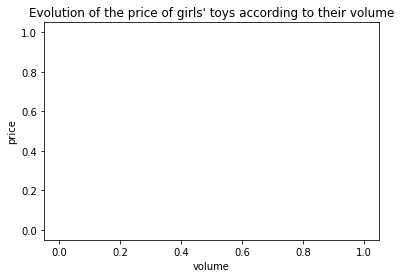

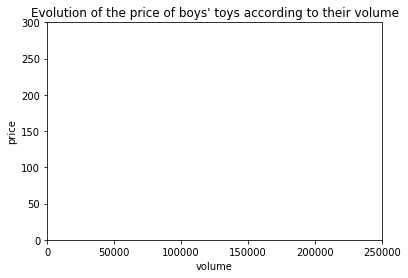

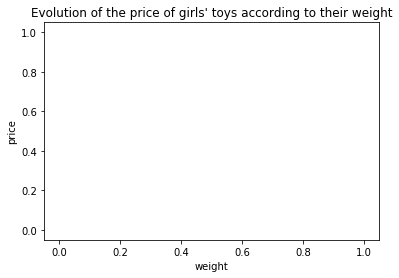

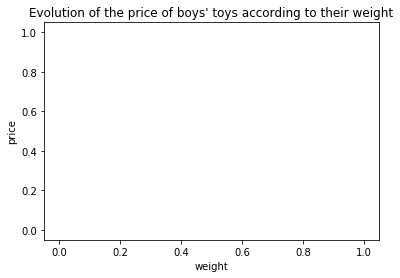

In [40]:
plt.scatter(TAILLE_FILLE,PRIX_FILLE,color="pink")
plt.title("Evolution of the price of girls' toys according to their volume")
plt.xlabel("volume")
plt.ylabel("price")
plt.show()
plt.scatter(TAILLE_GARCON,PRIX_GARCON,color="blue")
plt.xlim(right=250000,left=0)
plt.ylim(top=300,bottom=0)
plt.title("Evolution of the price of boys' toys according to their volume")
plt.xlabel("volume")
plt.ylabel("price")
plt.show()
plt.scatter(POID_FILLE,PRIX_P_FILLE,color="pink")
plt.title("Evolution of the price of girls' toys according to their weight")
plt.xlabel("weight")
plt.ylabel("price")
plt.show()
plt.scatter(POID_GARCON,PRIX_P_GARCON,color="blue")
plt.title("Evolution of the price of boys' toys according to their weight")
plt.xlabel("weight")
plt.ylabel("price")
plt.show()

# moyennes_g = []
# for i in range(100):
#     l1 = np.array(TAILLE_GARCON) > i*100
#     l2 = np.array(TAILLE_GARCON) < (i+1)*100
#     L = [l1[i] and l2[i] for i in range(len(l1))]
#     m = np.mean(np.array(PRIX_GARCON)[np.array(L)])
#     moyennes_g.append(m)
# plt.plot([i*100 for i in range(100)],moyennes_g,color="blue")

# moyennes_f = []
# for i in range(100):
#     l1 = np.array(TAILLE_FILLE) > i*100
#     l2 = np.array(TAILLE_FILLE) < (i+1)*100
#     L = [l1[i] and l2[i] for i in range(len(l1))]
#     m = np.mean(np.array(PRIX_FILLE)[np.array(L)])
#     moyennes_f.append(m)
# plt.plot([i*100 for i in range(100)],moyennes_f,color="pink")
# plt.legend(["boys","girls"])
# plt.title("Evolution of the average price of toys for boys and girls according to their volume")
# plt.xlabel("volume")
# plt.ylabel("average price")
# plt.show()

### Mosaiques d'images

On ne peut pas toujours mettre toutes les images sur les mosaiques, et certaines images ne sont pas dans la base de données (on les remplace par un carré blanc). 

#### Mosaiques d'images de jouets pour les garçons

In [4]:
# Garcons
import numpy as np
mosaique_boys = np.zeros((140*new_shape[0], 104*new_shape[1],3))
# 14424 images
# 44*49=2156
max_boys = 2157

manquants_boys = []

for count1 in range(140):
    for count2 in range(104):
        count = count1*104+count2

        try:
            image = imread(path_boy + 'Boy'+str(count)+'_0.jpg')
            image = resize(image, new_shape)
            mosaique_boys[count1*new_shape[0]:(count1+1)*new_shape[0], count2*new_shape[1]:(count2+1)*new_shape[1], :] = image
        #si l'image n'existe pas
        except:
            manquants_boys.append(count)
            mosaique_boys[count1*new_shape[0]:(count1+1)*new_shape[0], count2*new_shape[1]:(count2+1)*new_shape[1], :] = 1
            pass

        if count % ((140*104)//10) == 0:
            print(int(round(10*count/(140*104)))*10, "% loaded")

0 % loaded
10 % loaded
20 % loaded
30 % loaded
40 % loaded
50 % loaded
60 % loaded
70 % loaded
80 % loaded
90 % loaded


In [19]:
#les images qui n'ont pas été trouvées
print(manquants_boys)

[1097, 2081, 3083, 3139, 3346, 3633, 4106, 4544, 4799, 5214, 5281, 5312, 5539, 5582, 6505, 6583, 6584, 6818, 7155, 7256, 7475, 8036, 8587, 8589, 8927, 9435, 9498, 9527, 9714, 10499, 10794, 11018, 11942, 12169, 12560, 12576, 12687, 13155, 14185, 14425, 14426, 14427, 14428, 14429, 14430, 14431, 14432, 14433, 14434, 14435, 14436, 14437, 14438, 14439, 14440, 14441, 14442, 14443, 14444, 14445, 14446, 14447, 14448, 14449, 14450, 14451, 14452, 14453, 14454, 14455, 14456, 14457, 14458, 14459, 14460, 14461, 14462, 14463, 14464, 14465, 14466, 14467, 14468, 14469, 14470, 14471, 14472, 14473, 14474, 14475, 14476, 14477, 14478, 14479, 14480, 14481, 14482, 14483, 14484, 14485, 14486, 14487, 14488, 14489, 14490, 14491, 14492, 14493, 14494, 14495, 14496, 14497, 14498, 14499, 14500, 14501, 14502, 14503, 14504, 14505, 14506, 14507, 14508, 14509, 14510, 14511, 14512, 14513, 14514, 14515, 14516, 14517, 14518, 14519, 14520, 14521, 14522, 14523, 14524, 14525, 14526, 14527, 14528, 14529, 14530, 14531, 14532,

In [41]:
plt.figure()
plt.imshow(mosaique_boys)
plt.show()

KeyboardInterrupt: 

In [5]:
imsave('mosaique_boysBIG20.png', mosaique_boys)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


#### Mosaiques d'images de jouets mixtes

In [12]:
# Mixte
mosaique_mixte = np.zeros((140*new_shape[0], 131*new_shape[1],3))
# 10728 images
# 44*243=2156
max_mixte = 10728

manquants_mixte = []

for count1 in range(44):
    for count2 in range(243):
        count = count1*243+count2

        try:
            image = imread(path_mixt + 'Mixte'+str(count)+'_0.jpg')
            image = resize(image, new_shape)
            mosaique_mixte[count1*new_shape[0]:(count1+1)*new_shape[0], count2*new_shape[1]:(count2+1)*new_shape[1], :] = image
        #si l'image n'existe pas
        except:
            manquants_mixte.append(count)
            mosaique_mixte[count1*new_shape[0]:(count1+1)*new_shape[0], count2*new_shape[1]:(count2+1)*new_shape[1], :] = 1
            pass

        if count % ((44*243)//10) == 0:
            print(int(round(10*count/(44*243)))*10, "% loaded")

0 % loaded
10 % loaded
20 % loaded
30 % loaded
40 % loaded
50 % loaded
60 % loaded
70 % loaded
80 % loaded
90 % loaded
100 % loaded


In [13]:
print(manquants_mixte)

[1551, 5499, 5568, 6075, 6502, 7883, 8297, 8710, 9462]


In [15]:
#pour sauvgarder l'image
imsave('mosaique_mixte.png', mosaique_mixte)

C:\Users\marion\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


#### Mosaiques d'images de jouets pour les filles

In [6]:
# Filles
mosaique_girls = np.zeros((140*new_shape[0], 131*new_shape[1],3))

# on garde 18336 images aussi pour avoir la meme taille que les boys

manquants_girls = []

for count1 in range(140):
    for count2 in range(131):
        count = count1*131+count2

        try:
            image = imread(path_girl + 'Girl'+str(count)+'_0.jpg')
            image = resize(image, new_shape)
            mosaique_girls[count1*new_shape[0]:(count1+1)*new_shape[0], count2*new_shape[1]:(count2+1)*new_shape[1], :] = image
        except:
            manquants_girls.append(count)
            mosaique_girls[count1*new_shape[0]:(count1+1)*new_shape[0], count2*new_shape[1]:(count2+1)*new_shape[1], :] = 1
            pass

        if count % ((140*131)//10) == 0:
            print(int(round(10*count/(44*49)))*10, "% loaded")


0 % loaded
90 % loaded
170 % loaded
260 % loaded
340 % loaded
430 % loaded
510 % loaded
600 % loaded
680 % loaded
770 % loaded


In [7]:
print(manquants_girls)
imsave('mosaique_girlsBIG20.png', mosaique_girls)

[341, 1712, 2332, 3108, 3128, 5067, 5068, 5069, 5147, 5251, 5511, 7708, 7733, 9203, 10200, 10201, 10202, 10283, 10395, 10406, 10670, 11200, 11274, 13082, 13107, 13276, 13727, 14495, 15084, 15085, 15086, 15165, 15322, 15642, 15704, 16680, 16769, 17020, 17600, 17601, 17602, 17773, 18337, 18338, 18339]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


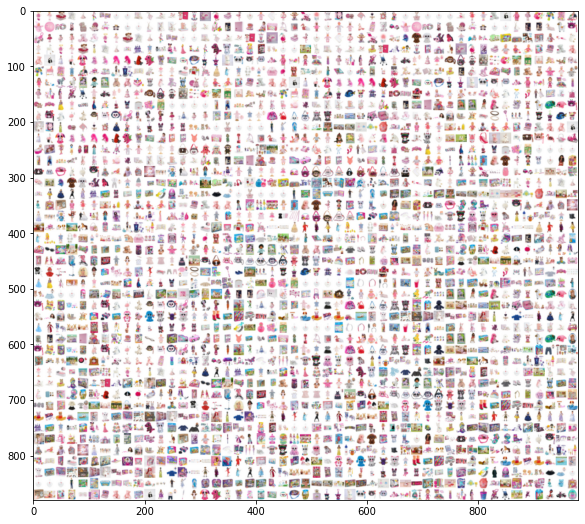

In [33]:
plt.figure(figsize=(10,9))
plt.imshow(mosaique_girls)
plt.show()

#### Mosaique d'images de jouets pour les garçons concacténée à la mosaique d'images de jouets pour les filles


In [10]:
mosaique = np.hstack((mosaique_boys, mosaique_girls))

# plt.figure(figsize=(20,9))
# plt.imshow(mosaique)
# plt.show()

MemoryError: Unable to allocate 7.35 GiB for an array with shape (14000, 23500, 3) and data type float64

In [9]:
imsave('mosaique_boysVSgirlsBIG.png', mosaique)

NameError: name 'imsave' is not defined

### Mosaiques avec les couleurs dominantes des images (en enlevant le blanc)

In [17]:
#code inspiré de https://stackoverflow.com/questions/3241929/python-find-dominant-most-common-color-in-an-image

#cette fonction n'a plus été utilisée par la suite, elle a été remplacée par la fonction du début de code qui permet plus facilement de comparer les couleurs. 
def get_couleur_dominante(im):
    NUM_CLUSTERS = 5

    ar = np.asarray(im)
    shape = ar.shape
    ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype(float)

    codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)

    vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
    counts, bins = scipy.histogram(vecs, len(codes))    # count occurrences


    index_max = scipy.argmax(counts)  # find most frequent
    peak1 = codes[index_max]
    if(peak1[0]>0.99 and peak1[1]>0.99 and peak1[2]>0.99):
        counts = np.delete(counts,index_max)
        vrai_index_max = scipy.argmax(counts) #find the second most frequent
        peak = codes[vrai_index_max]
        return(peak)
    else:
        return(peak1)

#### Mosaiques avec les couleurs dominantes des jouets mixtes

In [19]:
# Mixte mosaique couleur
mosaique_mixte_coul = np.zeros((44*new_shape[0], 243*new_shape[1],3))
# 10728 images
# 44*243=2156
max_mixte = 10728

manquants_mixte = []

for count1 in range(44):
    for count2 in range(243):
        count = count1*243+count2

        try:
            image = imread(path_mixt + 'Mixte'+str(count)+'_0.jpg')
            image = resize(image, new_shape)
            peak = get_couleur_dominante(image)
            image1 = np.zeros(new_shape + (3,))
            image1[:,:,0] = peak[0]
            image1[:,:,1] = peak[1]
            image1[:,:,2] = peak[2]
            mosaique_mixte_coul[count1*new_shape[0]:(count1+1)*new_shape[0], count2*new_shape[1]:(count2+1)*new_shape[1], :] = image1
        #si l'image n'existe pas
        except:
            manquants_mixte.append(count)
            mosaique_mixte_coul[count1*new_shape[0]:(count1+1)*new_shape[0], count2*new_shape[1]:(count2+1)*new_shape[1], :] = 1
            pass

        if count % ((44*243)//10) == 0:
            print(int(round(10*count/(44*243)))*10, "% loaded")

0 % loaded
10 % loaded
20 % loaded
30 % loaded
40 % loaded
50 % loaded
60 % loaded
70 % loaded
80 % loaded
90 % loaded
100 % loaded


In [20]:
imsave('mosaique_mixtecouldom.png', mosaique_mixte_coul)

C:\Users\marion\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


#### Mosaique avec les couleurs dominantes des jouets filles

In [5]:
# Filles mosaique de couleurs
mosaique_girls = np.zeros((44*new_shape[0], 49*new_shape[1],3))

# on garde 44*49=2156 images aussi pour avoir la meme taille que les boys

manquants_girls = []

for count1 in range(44):
    for count2 in range(49):
        count = count1*49+count2

        try:
            mypath = path_girl + 'Girl'+str(count)+'_0.jpg'
            image = imread(mypath)
            image = resize(image, new_shape)
            peak = get_couleur_dominante(image)
            image1 = np.zeros(new_shape + (3,))
            image1[:,:,0] = peak[0]
            image1[:,:,1] = peak[1]
            image1[:,:,2] = peak[2]
            mosaique_girls[count1*new_shape[0]:(count1+1)*new_shape[0], count2*new_shape[1]:(count2+1)*new_shape[1], :] = image1
        except:
            manquants_girls.append(count)
            mosaique_girls[count1*new_shape[0]:(count1+1)*new_shape[0], count2*new_shape[1]:(count2+1)*new_shape[1], :] = 1
            pass

        if count % ((44*49)//10) == 0:
            print(int(round(10*count/(44*49)))*10, "% loaded")

[ 41 312  38   9]
312
[41 38  9]
0 % loaded
[325  48  27]
325
[48 27]
[ 82 181  36  52  49]
181
[82 36 52 49]
[232  42   5  45  76]
232
[42  5 45 76]
[347  30  10  13]
347
[30 10 13]
[ 26 348   8  18]
348
[26  8 18]
[257  32  43  44  24]
257
[32 43 44 24]
[324  21   2  53]
324
[21  2 53]
[324  46   9  21]
324
[46  9 21]
[ 63  46 244  11  36]
244
[63 46 11 36]
[314  29  27  30]
314
[29 27 30]
[ 44   5  23  64 264]
264
[44  5 23 64]
[ 39   7  33 313   8]
313
[39  7 33  8]
[ 38   5  63 117 177]
177
[ 38   5  63 117]
[280  23  20  47  30]
280
[23 20 47 30]
[ 63  82 125  84  46]
125
[63 82 84 46]
[ 16 297  16  43  28]
297
[16 16 43 28]
[ 31 267  48  45   9]
267
[31 48 45  9]
[ 11  32 343  14]
343
[11 32 14]
[ 69 320   9   2]
320
[69  9  2]
[304  28  17  51]
304
[28 17 51]
[ 77 246  42  17  18]
246
[77 42 17 18]
[ 16 288  14  44  38]
288
[16 14 44 38]
[267  27  40  39  27]
267
[27 40 39 27]
[ 34  43  23 250  50]
250
[34 43 23 50]
[269  21  29  24  57]
269
[21 29 24 57]
[ 27  71  41 261]
261


In [9]:
imsave('mosaique_girls2ecouldominante.png', mosaique_girls)

C:\Users\marion\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


#### Mosaique avec les couleurs dominantes des jouets garçons

In [8]:
# Garcons mosaique de couleur
mosaique_boys = np.zeros((44*new_shape[0], 49*new_shape[1],3))
# 2157 images
# 44*49=2156
max_boys = 2157

manquants_boys = []

for count1 in range(44):
    for count2 in range(49):
        count = count1*49+count2

        try:
            image = imread(path_boy + 'Boy'+str(count)+'_0.jpg')
            image = resize(image, new_shape)
            peak = get_couleur_dominante(image)
            image1 = np.zeros(new_shape + (3,))
            image1[:,:,0] = peak[0]
            image1[:,:,1] = peak[1]
            image1[:,:,2] = peak[2]
            mosaique_boys[count1*new_shape[0]:(count1+1)*new_shape[0], count2*new_shape[1]:(count2+1)*new_shape[1], :] = image1
        #si l'image n'existe pas
        except:
            manquants_boys.append(count)
            mosaique_boys[count1*new_shape[0]:(count1+1)*new_shape[0], count2*new_shape[1]:(count2+1)*new_shape[1], :] = 1
            pass

        if count % ((44*49)//10) == 0:
            print(int(round(10*count/(44*49)))*10, "% loaded")


0 % loaded
10 % loaded
20 % loaded
30 % loaded
40 % loaded
50 % loaded
60 % loaded
70 % loaded
80 % loaded
90 % loaded
100 % loaded


In [11]:
imsave('mosaique_boys2ecouldominante.png', mosaique_boys)

C:\Users\marion\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


#### Mosaique avec les couleurs dominantes des jouets filles et des jouets garçons

In [13]:
mosaique = np.hstack((mosaique_boys, mosaique_girls))
imsave('mosaique_boysetgirls2ecouldominante.png', mosaique)

C:\Users\marion\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


## Mosaique de couleur avec couleur moyenne (sauf blanc)

In [4]:
def get_couleur_moyenne(im):
    NUM_CLUSTERS = 5
    ar = np.asarray(im)
    shape = ar.shape
    ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype(float)

    codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)

    vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
    counts, bins = scipy.histogram(vecs, len(codes))    # count occurrences


    index_max = scipy.argmax(counts)  # find most frequent
    counts = np.delete(counts,index_max)
    vrai_index_max = scipy.argmax(counts) #find the second most frequent

    peak = codes[vrai_index_max]
    mean = [0,0,0]
    c = 0
    for i in range(len(counts)):
        c = c + counts[i]
        mean[0]= mean[0] + counts[i]*codes[i][0]
        mean[1] = mean[1] + counts[i]*codes[i][1]
        mean[2] = mean[2] + counts[i]*codes[i][2]
    mean = np.asarray(mean)
    mean = mean/c
    return(mean)

#### Mosaique avec la couleur moyenne des jouets filles

In [7]:
# Filles mosaique de couleurs
mosaique_girls = np.zeros((44*new_shape[0], 49*new_shape[1],3))

# on garde 44*49=2156 images aussi pour avoir la meme taille que les boys

manquants_girls = []

for count1 in range(44):
    for count2 in range(49):
        count = count1*49+count2

        try:
            mypath = path_girl + 'Girl'+str(count)+'_0.jpg'
            image = imread(mypath)
            image = resize(image, new_shape)
            peak = get_couleur_moyenne(image)
            image1 = np.zeros(new_shape + (3,))
            image1[:,:,0] = peak[0]
            image1[:,:,1] = peak[1]
            image1[:,:,2] = peak[2]
            mosaique_girls[count1*new_shape[0]:(count1+1)*new_shape[0], count2*new_shape[1]:(count2+1)*new_shape[1], :] = image1
        except:
            manquants_girls.append(count)
            mosaique_girls[count1*new_shape[0]:(count1+1)*new_shape[0], count2*new_shape[1]:(count2+1)*new_shape[1], :] = 1
            pass

        if count % ((44*49)//10) == 0:
            print(int(round(10*count/(44*49)))*10, "% loaded")

0 % loaded
10 % loaded
20 % loaded
30 % loaded
40 % loaded
50 % loaded
60 % loaded
70 % loaded
80 % loaded
90 % loaded
100 % loaded


In [36]:
imsave('mosaique_girlscoulmoy.png', mosaique_girls)

C:\Users\marion\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


#### Mosaique avec les couleurs moyennes des jouets garçons

In [5]:
# Garcons mosaique de couleur
mosaique_boys = np.zeros((44*new_shape[0], 49*new_shape[1],3))
# 2157 images
# 44*49=2156
max_boys = 2157

manquants_boys = []

for count1 in range(44):
    for count2 in range(49):
        count = count1*49+count2

        try:
            image = imread(path_boy + 'Boy'+str(count)+'_0.jpg')
            image = resize(image, new_shape)
            peak = get_couleur_moyenne(image)
            image1 = np.zeros(new_shape + (3,))
            image1[:,:,0] = peak[0]
            image1[:,:,1] = peak[1]
            image1[:,:,2] = peak[2]
            mosaique_boys[count1*new_shape[0]:(count1+1)*new_shape[0], count2*new_shape[1]:(count2+1)*new_shape[1], :] = image1
        #si l'image n'existe pas
        except:
            manquants_boys.append(count)
            mosaique_boys[count1*new_shape[0]:(count1+1)*new_shape[0], count2*new_shape[1]:(count2+1)*new_shape[1], :] = 1
            pass

        if count % ((44*49)//10) == 0:
            print(int(round(10*count/(44*49)))*10, "% loaded")

0 % loaded
10 % loaded
20 % loaded
30 % loaded
40 % loaded
50 % loaded
60 % loaded
70 % loaded
80 % loaded
90 % loaded
100 % loaded


In [6]:
imsave('mosaique_boyscoulmoy.png', mosaique_boys)

C:\Users\marion\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


#### Concaténation des mosaiques avec les couleurs moyennes des jouets filles et des jouets garçons 

In [8]:
mosaique = np.hstack((mosaique_boys, mosaique_girls))
imsave('mosaique_boysetgirls2ecoulmoyenne.png', mosaique)

C:\Users\marion\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


## Détermination de la couleur dominante de toutes les images de la base de données

In [ ]:
csv.field_size_limit(maxInt)
cat_id_index = 10 #index de la colonne qui correspond à l'id de catégorie d'âge
genre_index = 2

N = []
C = []
with open(path_DB, newline='',encoding='utf-8') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';')
    for row in spamreader:
        if(row[0]=="id" or row[0]=="0"):
            print("ligne 1")
        else: 
            if(row[cat_id_index]!="None" and row[cat_id_index]!= "undefined" and row[genre_index]!="None" and row[genre_index]!="undefined"):
                genre = row[genre_index] #on récupère le genre du jouet
                cat = int(row[cat_id_index])
                id_jouet = row[0]
                if (genre == "Boy"):
                    path = path_boy
                    try : 
                        image = imread(path + str(row[0])+'_0.jpg')
                        image = resize(image, new_shape)
                        peak = get_couleur_dominante_hsv(image)
                        N.append(row[0])
                        C.append(peak)
                    except :
                        N.append(row[0])
                        C.append("-1" )
                if (genre == "Girl"):
                    path = path_girl
                    try : 
                        image = imread(path + str(row[0])+'_0.jpg')
                        image = resize(image, new_shape)
                        peak = get_couleur_dominante_hsv(image)
                        N.append(row[0])
                        C.append(peak)
                    except : 
                        N.append(row[0])
                        C.append("-1")
                if(genre == "Mixte"):
                    path = path_mixt
                    try : 
                        image = imread(path + str(row[0])+'_0.jpg')
                        image = resize(image, new_shape)
                        peak = get_couleur_dominante_hsv(image)
                        N.append(row[0])
                        C.append(peak)
                    except : 
                        N.append(row[0])
                        C.append("-1")
            else :
                N.append("X")
                C.append("X")
    
print(N)
print(C)

In [ ]:
print(len(C))
print(C)
print(len(N))

In [ ]:
for c in C : 
    print(c)

In [ ]:
#Pour enregistrer

import csv
with open('eggs8.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=';')
    spamwriter.writerow(C)
    spamwriter.writerow(N)